In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

AttributeError: module 'fiona' has no attribute '_loading'

In [3]:
barang = pd.read_csv('Dataset-barang-angkut.csv')
kota = pd.read_csv('dataset_lat-long_jatim.csv', sep=';')

In [4]:
barang.head()

,ID,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS
0,1,Kabupaten Bondowoso,Kabupaten Pacitan,15,1655000,GAS
1,2,Kabupaten Bondowoso,Kabupaten Pacitan,25,2005000,PADAT
2,3,Kabupaten Bondowoso,Kabupaten Pacitan,30,2180000,CAIR
3,4,Kabupaten Bondowoso,Kabupaten Ponorogo,15,1465000,GAS
4,5,Kabupaten Bondowoso,Kabupaten Ponorogo,25,1815000,PADAT


In [5]:
kota.head()

,ID,Daerah,Latitude,Longitude
0,1,Surabaya,"-7,263360277","112,7456592"
1,2,Probolinggo,"-7,743461818","113,2159045"
2,3,Pasuruan,"-7,641949693","112,906654"
3,4,Mojokerto,"-7,463309884","112,4317742"
4,5,Malang,"-7,982646369","112,6306718"


In [ ]:
plt.figure(figsize=(16,9))
x = plt.imread('Assets/Peta Jawa Timur.png')
plt.imshow(x)


plt.scatter(kota['Latitude'][:5], kota['Longitude'][:5])
plt.xticks(kota['Latitude'])
plt.show()

In [49]:
gs = gpd.GeoSeries.from_xy(kota['Longitude'], kota['Latitude'])
gdf = gpd.GeoDataFrame(kota, geometry=gs)
gdf


,ID,Daerah,Latitude,Longitude,geometry
0,1,Surabaya,-7.263360,112.745659,POINT (112.74566 -7.26336)
1,2,Probolinggo,-7.743462,113.215904,POINT (113.21590 -7.74346)
2,3,Pasuruan,-7.641950,112.906654,POINT (112.90665 -7.64195)
3,4,Mojokerto,-7.463310,112.431774,POINT (112.43177 -7.46331)
4,5,Malang,-7.982646,112.630672,POINT (112.63067 -7.98265)
5,6,Madiun,-7.629246,111.516911,POINT (111.51691 -7.62925)
6,7,Kediri,-7.826602,112.011025,POINT (112.01102 -7.82660)
7,8,Blitar,-8.098276,112.165292,POINT (112.16529 -8.09828)
8,9,Batu,-7.871129,112.526730,POINT (112.52673 -7.87113)
9,10,Tulungagung,-8.064680,111.900586,POINT (111.90059 -8.06468)


<AxesSubplot:>

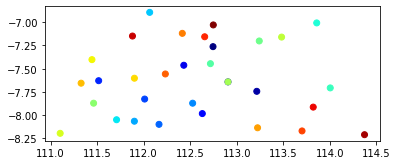

In [53]:
gdf.plot(cmap='jet')

In [ ]:
kota['Latitude'] = kota['Latitude'].astype('string').str.replace(',','.').astype('float64')
kota['Longitude'] = kota['Longitude'].astype('string').str.replace(',','.').astype('float64')

In [29]:
kotaZ = kota.loc[kota['Daerah'] == 'Kediri']
kotaX = kota.loc[kota['Daerah'] == 'Surabaya']
KotaZX = pd.concat([kotaX,kotaZ])
KotaZX

,ID,Daerah,Latitude,Longitude
0,1,Surabaya,-7.263360,112.745659
6,7,Kediri,-7.826602,112.011025


TypeError: __init__() missing 1 required positional argument: 'locs'

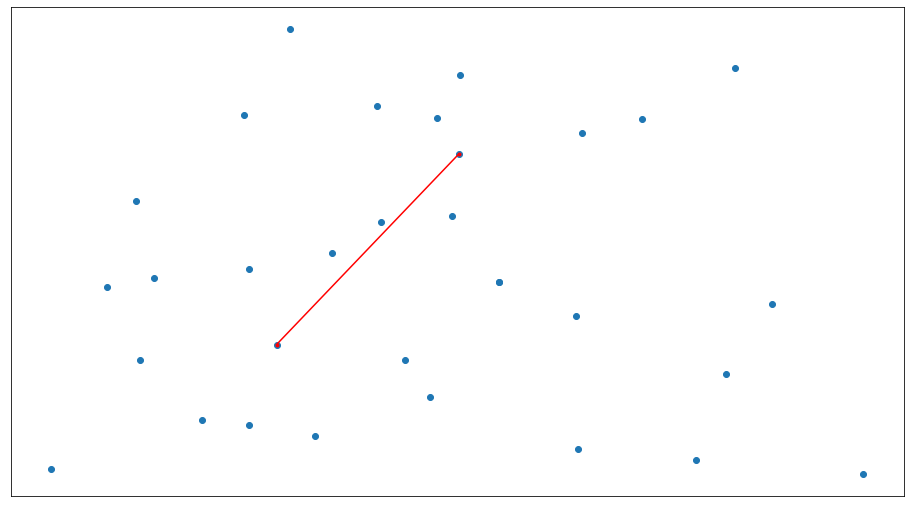

In [57]:
plt.figure(figsize=(16,9))

plt.scatter(kota['Longitude'], kota['Latitude'])
plt.plot(KotaZX['Longitude'], KotaZX['Latitude'], '.-r')
#plt.imshow(x)
# plt.xticks(kota['Latitude'])
# plt.yticks(kota['Longitude'])
plt.xticks([])
plt.yticks([])
#plt.savefig('Peta.png')
plt.show()

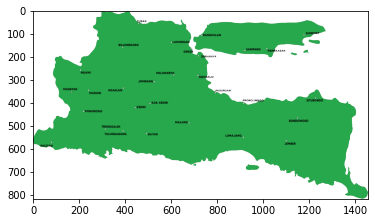

In [54]:
plt.imshow(x)

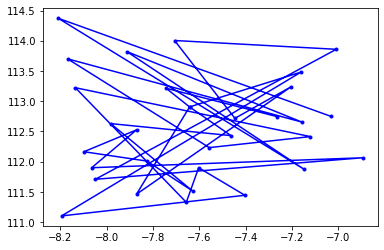

In [38]:
plt.plot(kota['Latitude'], kota['Longitude'], '.-b')

ValueError: Expected 2D array, got 1D array instead:
array=[-7.26336028 -7.74346182 -7.64194969 -7.46330988 -7.98264637 -7.6292461
 -7.82660216 -8.09827633 -7.87112889 -8.06468026 -6.89501168 -8.04880385
 -7.00839954 -7.70676286 -7.44622837 -7.20228406 -7.87102822 -7.64194289
 -7.16062943 -8.19471484 -7.40288918 -7.60269877 -7.65604147 -8.13519324
 -7.12044176 -7.55690613 -8.16906907 -7.15713059 -7.91314882 -7.14949527
 -8.20941794 -7.03008005].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
gpdf = gpd.read_('dataset_lat-long_jatim.csv', sep=';')

In [54]:
kotaAwal = 'Surabaya'
kotaAkhir = 'Probolinggo'

JatahBensin = 50

BatasMuatan = 400

In [55]:
rute1 = barang.loc[(barang['INITIAL'] == kotaAwal) & (barang['GOAL'] == kotaAkhir)]
rute1

,ID,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS
1245,1246,Surabaya,Probolinggo,15,772500,GAS
1246,1247,Surabaya,Probolinggo,25,1122500,PADAT
1247,1248,Surabaya,Probolinggo,30,1297500,CAIR


In [56]:
rute1['REWARD'].max()

1297500

In [57]:
bebanMuatan = 'BEBAN MUATAN (TON)'
rute2 = rute1.loc[rute1['REWARD'] >= rute1['REWARD'].max()]
rute2['JENIS']

1247    CAIR
Name: JENIS, dtype: object

In [58]:

Jenis = rute2['JENIS'].to_list()
if Jenis[0] == 'CAIR' or Jenis[0] == 'GAS':
    rute2[bebanMuatan] = rute2[bebanMuatan] + 4

rute2

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS
1247,1248,Surabaya,Probolinggo,34,1297500,CAIR


In [ ]:
(123,1231,131)

In [60]:
barang.loc[(barang['INITIAL'] == kotaAwal) & (barang['GOAL'] == kotaAwal)]

,ID,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS
